### Which MOEA is the Best ?

Algorithms to be considered
* SPEA 2
* NSGA 2
* RNSGA2
* MOEA/D (Chebychev , Weighted sum , Penalty Boundary Intersection)
* NSGA 3

Literature Review:
* papers on all these algorithms (Foundational Papers)
* Test Problems Definitions 
* Evaluation Metrics (Strongly Pareto Compliant and Weakly Pareto Compliant)

In [23]:
from pymoo.util.function_loader import is_compiled;print('Compiled Extensions: ', is_compiled())
import numpy as np
from pymoo.util.plotting import plot

Compiled Extensions:  True


In [24]:
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many.dtlz import DTLZ3
from pymoo.problems.many.dtlz import DTLZ4
from pymoo.problems.many.dtlz import DTLZ5
from pymoo.problems.many.dtlz import DTLZ6
from pymoo.problems.many.dtlz import DTLZ7
from pymoo.visualization.scatter import Scatter
from pymoo.optimize import minimize
from pymoo.indicators.hv import HV


In [25]:
# Hypervolume of pareto front of problem for n_vars = 2,3,5,10
problem_5 = DTLZ7(n_var=5)
original_pareto_front_2 = problem_5.pareto_front()
objective_nvar2_1 = [i[0] for i in original_pareto_front_2]
objective_nvar2_2 = [i[1] for i in original_pareto_front_2]
objective_nvar2_3 = [i[2] for i in original_pareto_front_2]
ref_vector_2 = [max(objective_nvar2_1),max(objective_nvar2_2),max(objective_nvar2_3)]
ind = HV(ref_point=ref_vector_2)
Hypervolume_nvar5 = ind(original_pareto_front_2)


problem_7 = DTLZ7(n_var=7)
original_pareto_front_3 = problem_7.pareto_front()
objective_nvar3_1 = [i[0] for i in original_pareto_front_3]
objective_nvar3_2 = [i[1] for i in original_pareto_front_3]
objective_nvar3_3 = [i[2] for i in original_pareto_front_3]
ref_vector_3 = [max(objective_nvar3_1),max(objective_nvar3_2),max(objective_nvar3_3)]
ind = HV(ref_point=ref_vector_3)
Hypervolume_nvar7 = ind(original_pareto_front_3)


problem_10 = DTLZ7(n_var=10)
original_pareto_front_5 = problem_10.pareto_front()
objective_nvar5_1 = [i[0] for i in original_pareto_front_5]
objective_nvar5_2 = [i[1] for i in original_pareto_front_5]
objective_nvar5_3 = [i[2] for i in original_pareto_front_5]
ref_vector_5 = [max(objective_nvar5_1),max(objective_nvar5_2),max(objective_nvar5_3)]
ind = HV(ref_point=ref_vector_5)
Hypervolume_nvar10 = ind(original_pareto_front_5)



n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |      8 |  2.0641849583 |  2.5395388941 |  0.000000E+00 |  8.3826783542 |  6.3985144474
     2 |      200 |     10 |  1.4577619089 |  2.1026673900 |  0.000000E+00 |  6.8915951107 |  4.0648773371
     3 |      300 |     12 |  1.4371485667 |  1.8086795338 |  0.000000E+00 |  5.8926921935 |  4.0648773371
     4 |      400 |     18 |  1.1876997242 |  2.1703283161 |  0.000000E+00 |  7.1894396995 |  3.2800013207
     5 |      500 |     24 |  1.1400646490 |  1.7084540419 |  0.000000E+00 |  5.6522982101 |  3.2050358754
     6 |      600 |     26 |  0.9375347401 |  1.5094811831 |  0.000000E+00 |  4.9996025041 |  2.6157166654
     7 |      700 |     23 |  0.8420376970 |  1.0828468867 |  0.000000E+00 |  3.5903167091 |  2.1390187150
     8 |      800 |     22 |  0.8176950724 |  0.8543428476 |  0.000000E+00 |  2.7915596044 |  1.9117705095
     9 |      900 |     26 |  0.71340

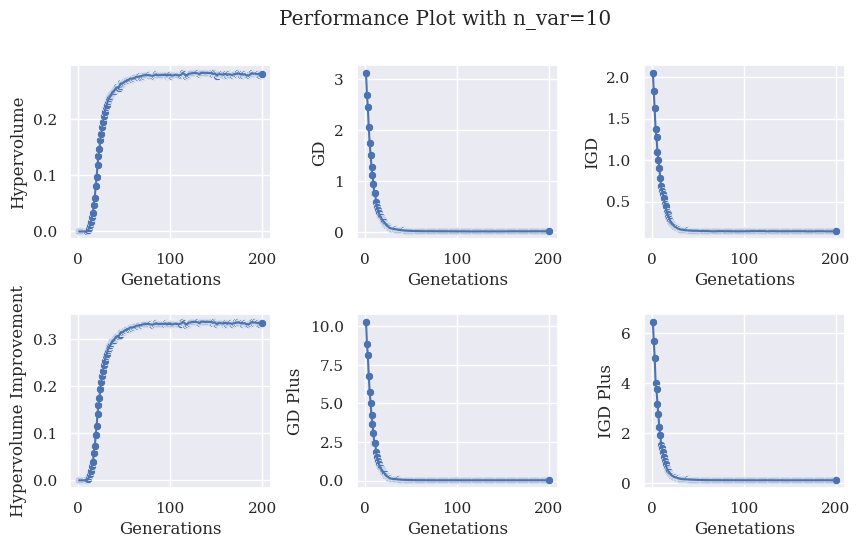

Max values of Hypervolume is 0.2830636960960352 
 , Best value of GD is 0.013149564139597756 
 , Best value of IGD is 
 0.14043076717164638 Best value of GD+ is 0.015171414129501598 , Best value of IGD+ is 0.1100707047666667


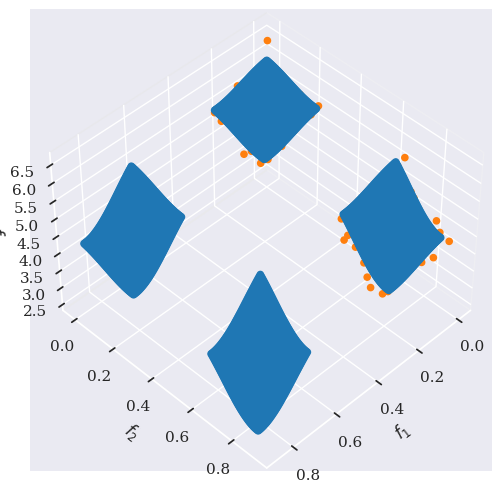

In [26]:
model_list = []
problem = DTLZ7(n_var =10)
algorithm = SPEA2(pop_size=100)
np.random.seed(10)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
plot = Scatter()
plot.add(original_pareto_front)
plot.add(model_list[0].F)
plot.show()
#plt.show()

#### SPEA2 with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     16 |  2.1148208337 |  2.8076397458 |  0.000000E+00 |  9.2315600659 |  6.6242331415
     2 |      200 |     24 |  1.7881286291 |  2.6193366600 |  0.000000E+00 |  8.6657982944 |  5.6712642350
     3 |      300 |     20 |  1.4960704163 |  2.1312947098 |  0.000000E+00 |  6.8038980729 |  4.0675281565
     4 |      400 |     21 |  1.1951553286 |  1.8652903419 |  0.000000E+00 |  6.0061980433 |  3.4057057563
     5 |      500 |     20 |  1.0448965368 |  1.8310362902 |  0.000000E+00 |  6.1074943969 |  2.9177915150
     6 |      600 |     29 |  0.8505710598 |  1.3472315326 |  0.000000E+00 |  4.3975432007 |  2.2970893199
     7 |      700 |     20 |  0.8403688363 |  1.1556858988 |  0.000000E+00 |  3.7341696424 |  2.1325219652
     8 |      800 |     26 |  0.7501113263 |  1.0473285309 |  0.000000E+00 |  3.3827346448 |  1.5539989162
     9 |      900 |     33 |  0.56690

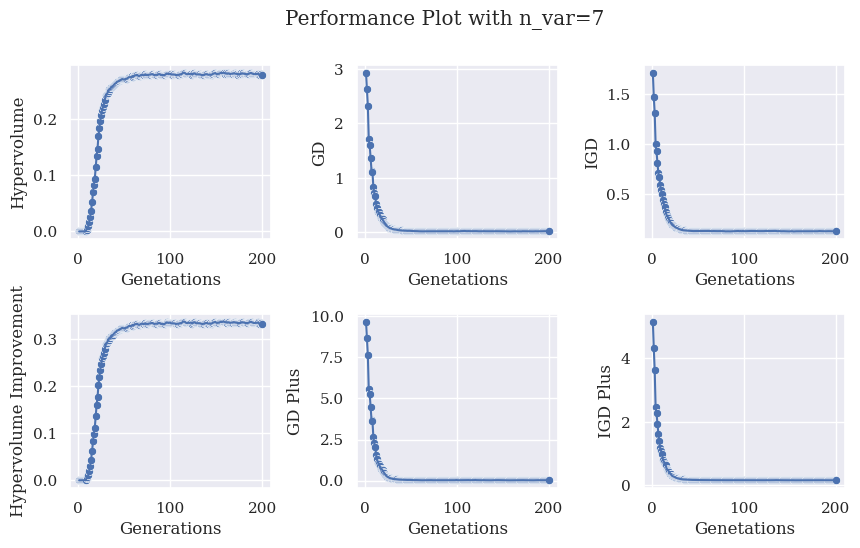

Max values of Hypervolume is 0.28268694679123585 
 , Best value of GD is 0.013514256784795472 
 , Best value of IGD is 
 0.13248256253214893 Best value of GD+ is 0.015646418878407845 , Best value of IGD+ is 0.1575674925675462


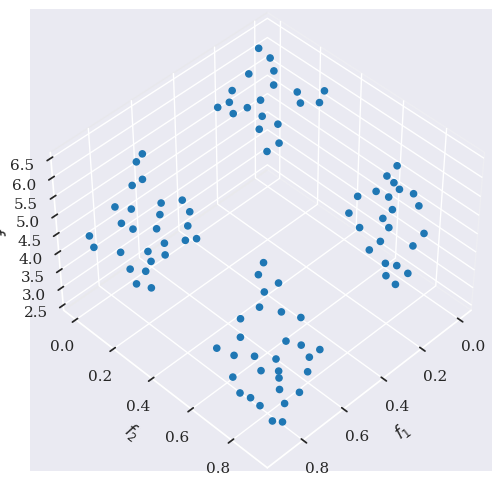

In [27]:
model_list = []
problem = DTLZ7(n_var =7)
algorithm = SPEA2(pop_size=100)
np.random.seed(11)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### SPEA2 with nvar5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     17 |  1.5548220126 |  2.2292870627 |  0.000000E+00 |  7.2599366080 |  4.8632960470
     2 |      200 |     14 |  1.1667664227 |  2.5067292162 |  0.000000E+00 |  8.2977965853 |  3.3560356993
     3 |      300 |     20 |  0.8286171781 |  1.7955760186 |  0.000000E+00 |  5.8618520473 |  1.4215633656
     4 |      400 |     24 |  0.7217320682 |  1.2440045242 |  0.000000E+00 |  3.9627243046 |  1.4174722364
     5 |      500 |     24 |  0.6552347779 |  1.2155969428 |  0.000000E+00 |  3.8867552281 |  1.4165174776
     6 |      600 |     33 |  0.4867416851 |  0.9622476400 |  0.0016370365 |  3.0343579994 |  1.0287838917
     7 |      700 |     35 |  0.3611403914 |  0.8829431060 |  0.0230061961 |  2.8017918481 |  0.9392274653
     8 |      800 |     31 |  0.2776478859 |  0.9056040016 |  0.0382013980 |  2.9206474521 |  0.5538486632
     9 |      900 |     43 |  0.22674

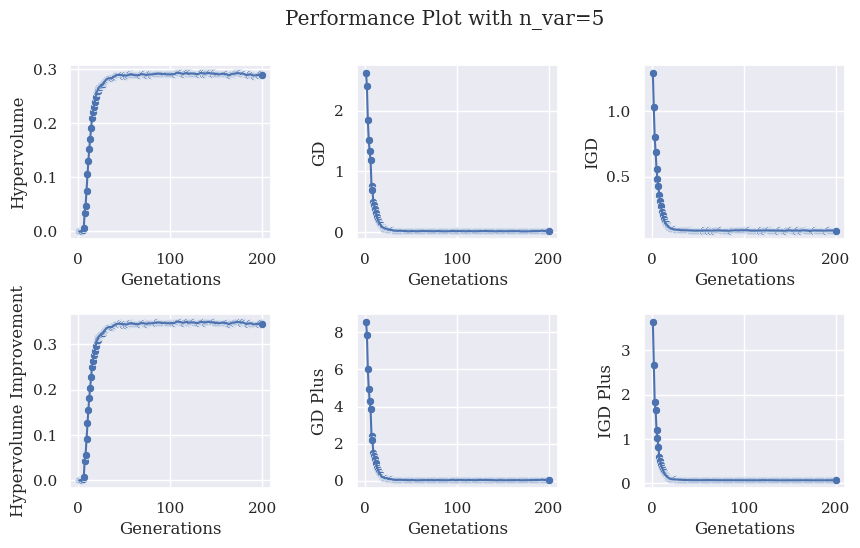

Max values of Hypervolume is 0.29358645497011765 
 , Best value of GD is 0.01476653500728042 
 , Best value of IGD is 
 0.0828740253182875 Best value of GD+ is 0.01694930021699971 , Best value of IGD+ is 0.06975688225067397


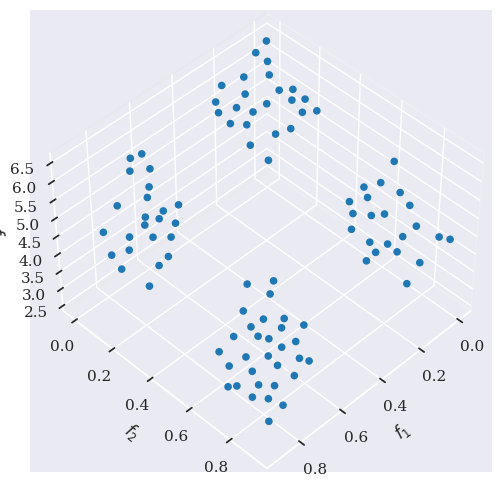

In [28]:
model_list = []
problem = DTLZ7(n_var =5)
algorithm = SPEA2(pop_size=100)
np.random.seed(12)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA2 with nvar5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     23 |  0.9241850440 |  2.5333350007 |  0.000000E+00 |  8.2885746749 |  2.1358443318
     2 |      200 |     27 |  0.8944709728 |  2.1908732003 |  0.000000E+00 |  7.1486748485 |  1.9739335772
     3 |      300 |     22 |  0.6761238763 |  1.9743525769 |  0.0027830067 |  6.4191588790 |  1.2999564763
     4 |      400 |     28 |  0.6758944727 |  1.6503802618 |  0.0027830067 |  5.3236300010 |  1.2999564763
     5 |      500 |     23 |  0.4973103622 |  1.4873362850 |  0.0027830067 |  4.8196359988 |  1.2686569819
     6 |      600 |     21 |  0.4889884937 |  0.9299669925 |  0.0290235147 |  2.9776491342 |  0.8375842224
     7 |      700 |     33 |  0.4646549716 |  0.9576799078 |  0.0309785134 |  3.1105911377 |  0.8374993755
     8 |      800 |     37 |  0.4350420694 |  0.7049879942 |  0.0396194931 |  2.2488361907 |  0.8264585492
     9 |      900 |     46 |  0.30712

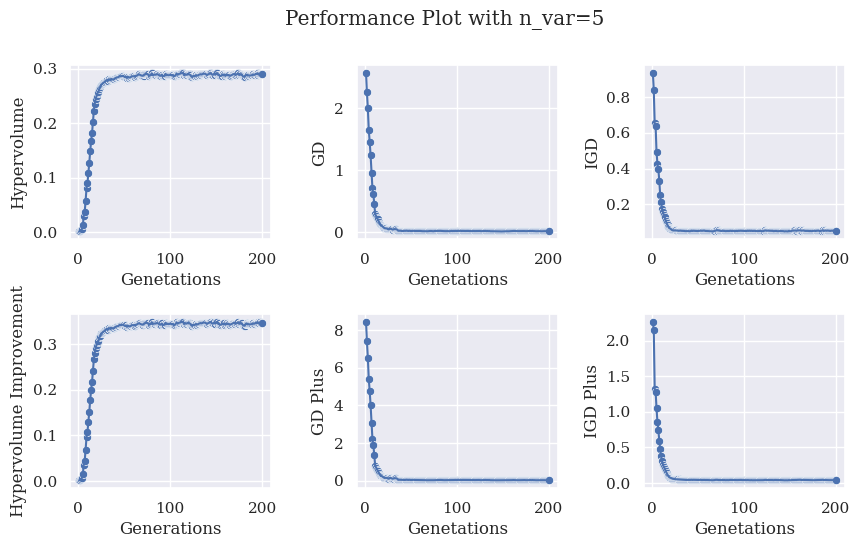

Max values of Hypervolume is 0.29257189500456143 
 , Best value of GD is 0.014558319006468923 
 , Best value of IGD is 
 0.04892543925046692 Best value of GD+ is 0.015138136281035372 , Best value of IGD+ is 0.03664565235504009


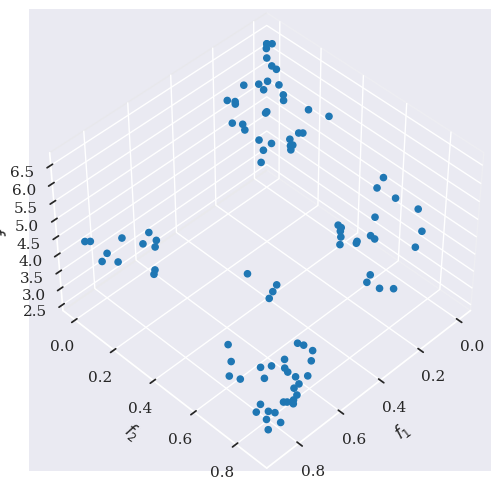

In [29]:
model_list = []
problem = DTLZ7(n_var =5)
algorithm = NSGA2(pop_size=100)
np.random.seed(13)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA2 with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     16 |  1.9127044891 |  3.0970280682 |  0.000000E+00 |  1.030135E+01 |  6.1099614601
     2 |      200 |     27 |  1.5751300284 |  2.7276452995 |  0.000000E+00 |  9.0462955919 |  4.9961319147
     3 |      300 |     17 |  1.1949928370 |  2.3805333542 |  0.000000E+00 |  7.7968206599 |  3.1349521023
     4 |      400 |     20 |  1.0673016845 |  2.4061530787 |  0.000000E+00 |  7.9526731745 |  3.1172010220
     5 |      500 |     24 |  0.6252747064 |  1.4688700991 |  0.0038909077 |  4.7473285064 |  0.9215100197
     6 |      600 |     23 |  0.5172302658 |  1.2166336852 |  0.0041882009 |  3.9275112120 |  0.7453276736
     7 |      700 |     28 |  0.4106819851 |  1.0873785999 |  0.0055234096 |  3.5460412713 |  0.5904807900
     8 |      800 |     37 |  0.2558292158 |  0.8400339085 |  0.0239521998 |  2.6547557178 |  0.4446935793
     9 |      900 |     41 |  0.20891

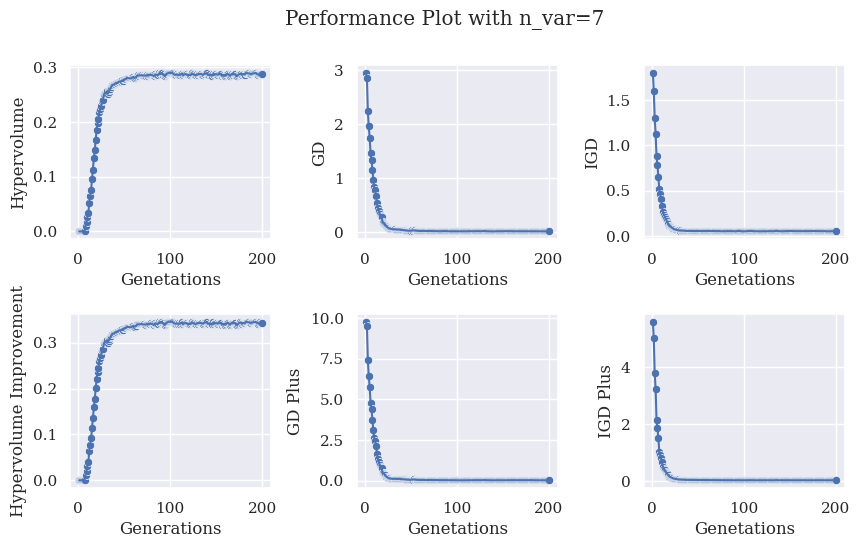

Max values of Hypervolume is 0.2902146657545741 
 , Best value of GD is 0.014670367226269368 
 , Best value of IGD is 
 0.04880035251586388 Best value of GD+ is 0.013739112315998548 , Best value of IGD+ is 0.03734809845352336


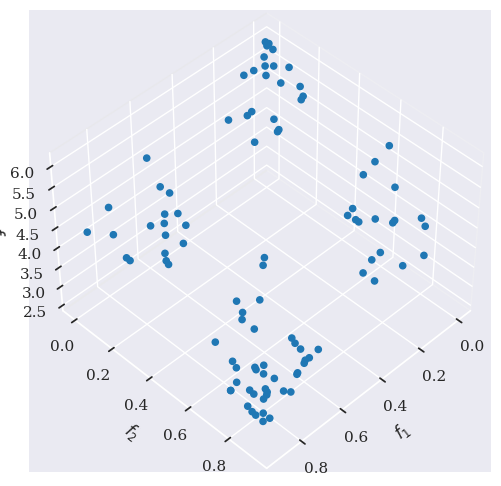

In [30]:
model_list = []
problem = DTLZ7(n_var =7)
algorithm = NSGA2(pop_size=100)
np.random.seed(14)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA2 with nvar10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     13 |  1.9602241734 |  3.1499138494 |  0.000000E+00 |  1.050736E+01 |  6.2622005347
     2 |      200 |     20 |  1.9192825062 |  2.9809952625 |  0.000000E+00 |  1.001786E+01 |  6.1127055528
     3 |      300 |     28 |  1.8220963554 |  2.5538890453 |  0.000000E+00 |  8.5216058929 |  5.9046739843
     4 |      400 |     29 |  1.4255553963 |  2.4909449730 |  0.000000E+00 |  8.3036565468 |  3.8838696947
     5 |      500 |     25 |  1.2608991485 |  2.2439039612 |  0.000000E+00 |  7.4779934187 |  3.8838696947
     6 |      600 |     26 |  1.2235265840 |  2.0804658243 |  0.000000E+00 |  6.9578005223 |  3.4833110461
     7 |      700 |     31 |  1.1033308567 |  1.8438839002 |  0.000000E+00 |  6.1687128739 |  3.4833110461
     8 |      800 |     36 |  0.8130656402 |  1.6186008126 |  0.000000E+00 |  5.4042160252 |  1.7115199676
     9 |      900 |     37 |  0.66872

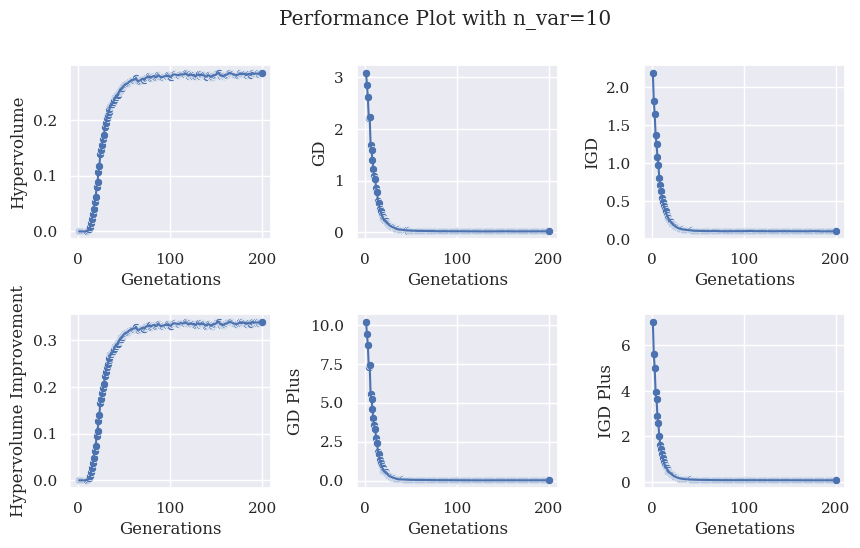

Max values of Hypervolume is 0.2846166718575563 
 , Best value of GD is 0.014556383448230997 
 , Best value of IGD is 
 0.09670633170949336 Best value of GD+ is 0.013887887677662806 , Best value of IGD+ is 0.07421747285309817


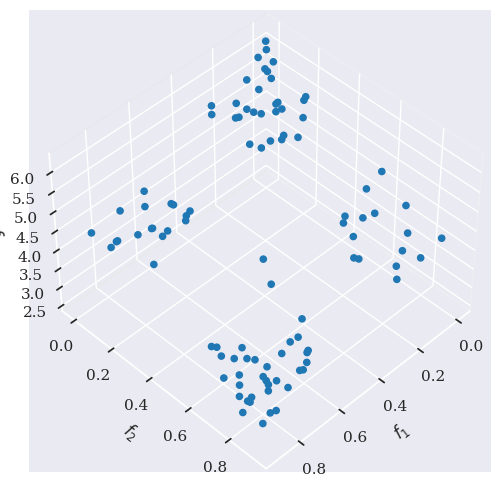

In [31]:
model_list = []
problem = DTLZ7(n_var =10)
algorithm = NSGA2(pop_size=100)
np.random.seed(15)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=10)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

In [32]:
from pymoo.util.ref_dirs import get_reference_directions
ref_dirs = get_reference_directions('energy',3,200,seed=1)

#### MOEAD with nvar5

In [33]:
from pymoo.algorithms.moo.moead import MOEAD

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      200 |     17 |  0.8485734627 |  1.8241352432 |  0.000000E+00 |  5.8581728133 |  1.5837143746
     2 |      400 |     52 |  0.6335433230 |  0.0507520419 |  0.0508692194 |  0.0502660927 |  0.5268027699
     3 |      600 |    155 |  0.5161731434 |  0.0308441785 |  0.1003354868 |  0.0373814316 |  0.4450180496
     4 |      800 |    149 |  0.4793989807 |  0.0349779788 |  0.1112577456 |  0.0435136003 |  0.4024771406
     5 |     1000 |     95 |  0.4558614053 |  0.0552318573 |  0.1203407463 |  0.0580868028 |  0.3801681993
     6 |     1200 |    116 |  0.4383319762 |  0.0532658633 |  0.1247527268 |  0.0536110908 |  0.3757462364
     7 |     1400 |    108 |  0.4377681876 |  0.0397326840 |  0.1290316754 |  0.0360339341 |  0.3574375577
     8 |     1600 |    107 |  0.4041979516 |  0.0383018885 |  0.1431617590 |  0.0296082767 |  0.3361922159
     9 |     1800 |    102 |  0.35742

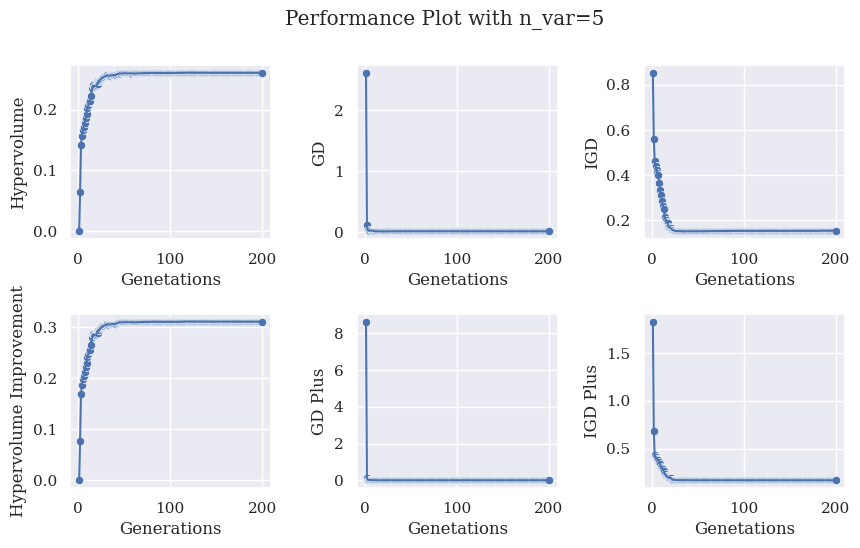

Max values of Hypervolume is 0.2604323317912509 
 , Best value of GD is 0.010710297963670717 
 , Best value of IGD is 
 0.15155455546877675 Best value of GD+ is 0.007969754506577829 , Best value of IGD+ is 0.16768721200635617


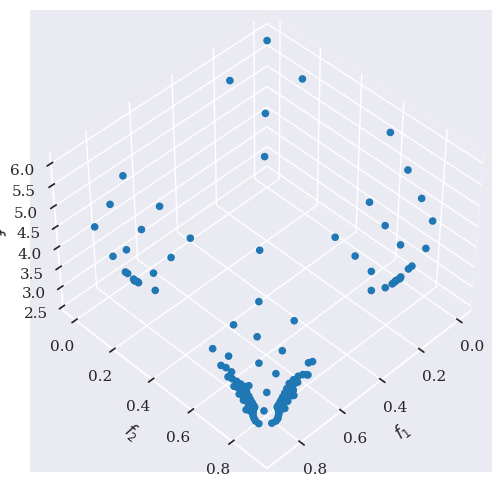

In [34]:
model_list = []
problem = DTLZ7(n_var =5)
algorithm = MOEAD(ref_dirs = ref_dirs)
np.random.seed(16)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### MOEAD with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      200 |     22 |  1.0587626643 |  3.0598267103 |  0.000000E+00 |  1.011707E+01 |  1.9994111492
     2 |      400 |     86 |  0.4632738674 |  0.2917324927 |  0.0375409182 |  0.5332919948 |  0.9326797525
     3 |      600 |     84 |  0.3502177333 |  0.1906241265 |  0.0980872534 |  0.1318783125 |  0.4678022793
     4 |      800 |     97 |  0.3247100037 |  0.0646031308 |  0.1554022041 |  0.0421323480 |  0.3012207572
     5 |     1000 |    120 |  0.3161827486 |  0.0272233953 |  0.1966720050 |  0.0189107922 |  0.2659915335
     6 |     1200 |    105 |  0.3114654082 |  0.0236278373 |  0.2071331903 |  0.0135925405 |  0.2596929657
     7 |     1400 |     89 |  0.3101900293 |  0.0239961727 |  0.2129871420 |  0.0152109241 |  0.2538458403
     8 |     1600 |    112 |  0.3168373138 |  0.0153130404 |  0.2215284043 |  0.0096576646 |  0.2515818566
     9 |     1800 |    119 |  0.30993

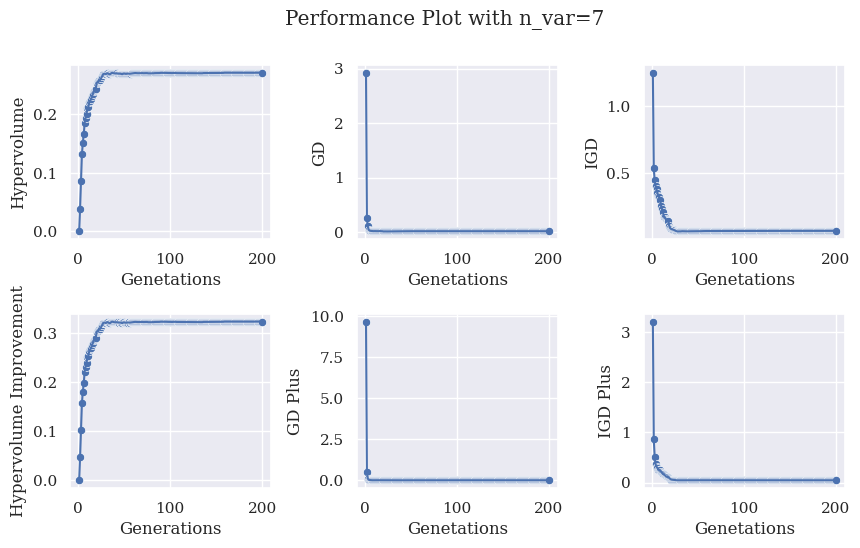

Max values of Hypervolume is 0.27092846578333035 
 , Best value of GD is 0.010854888218335312 
 , Best value of IGD is 
 0.05988402019978286 Best value of GD+ is 0.008233460069906842 , Best value of IGD+ is 0.044781604411858064


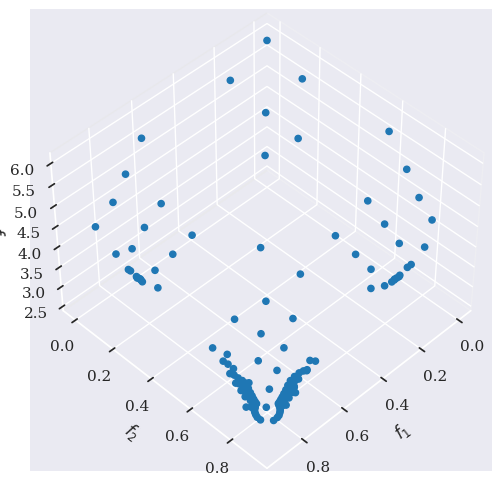

In [35]:
model_list = []
problem = DTLZ7(n_var =7)
algorithm = MOEAD(ref_dirs = ref_dirs)
np.random.seed(17)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### MOEAD with nvar10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      200 |     21 |  1.9523153586 |  2.9164585221 |  0.000000E+00 |  9.6001609066 |  6.0091356644
     2 |      400 |    114 |  0.9031048654 |  0.4810469815 |  0.000000E+00 |  1.2106251513 |  2.0094832588
     3 |      600 |     75 |  0.7186372970 |  0.3280299010 |  0.0094403002 |  0.6506713200 |  1.2063930578
     4 |      800 |     82 |  0.6357408226 |  0.1844235140 |  0.0297010697 |  0.2822660271 |  0.7654274169
     5 |     1000 |     89 |  0.5678541343 |  0.0673597185 |  0.0640540102 |  0.0978488518 |  0.4724210102
     6 |     1200 |    114 |  0.5369652258 |  0.0393282297 |  0.0877854074 |  0.0597638785 |  0.4306877180
     7 |     1400 |    113 |  0.5228084750 |  0.0265056767 |  0.0949104751 |  0.0336275943 |  0.4118659157
     8 |     1600 |    102 |  0.5106434999 |  0.0252309522 |  0.0987282700 |  0.0344226011 |  0.4147923178
     9 |     1800 |    113 |  0.44221

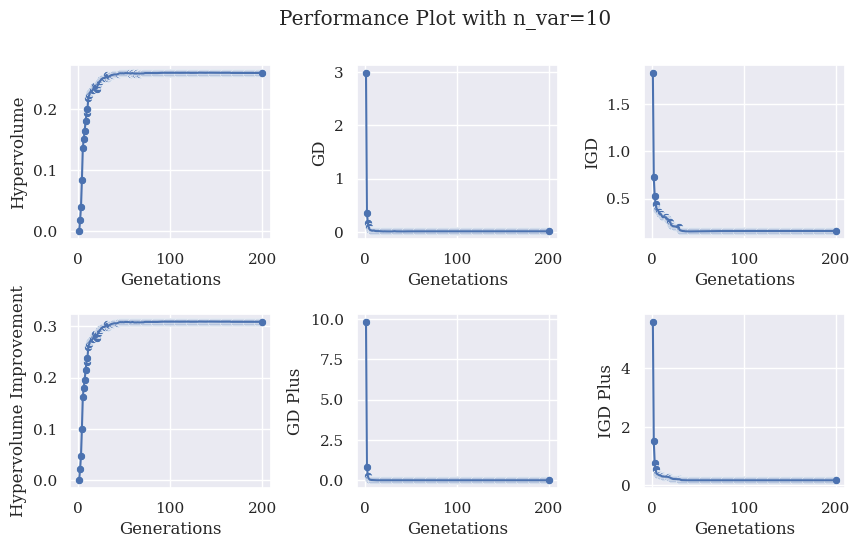

Max values of Hypervolume is 0.25947644208483805 
 , Best value of GD is 0.011050714928636083 
 , Best value of IGD is 
 0.15032205597187304 Best value of GD+ is 0.008229618382057803 , Best value of IGD+ is 0.16795808131384843


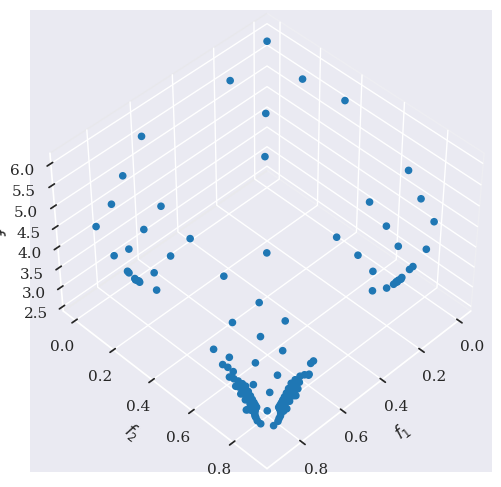

In [36]:
model_list = []
problem = DTLZ7(n_var =10)
algorithm = MOEAD(ref_dirs = ref_dirs)
np.random.seed(18)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=10)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA3 with nvar5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      200 |     20 |  0.8741605275 |  2.4188627358 |  0.000000E+00 |  7.8675004507 |  2.5698068731
     2 |      400 |     16 |  0.8741605275 |  1.6752864433 |  0.000000E+00 |  5.3982759867 |  2.5698068731
     3 |      600 |     25 |  0.8088338471 |  1.5632138630 |  0.000000E+00 |  5.0675850598 |  2.1341445019
     4 |      800 |     31 |  0.7757518373 |  1.7722441670 |  0.000000E+00 |  5.7943244351 |  2.1616846517
     5 |     1000 |     25 |  0.5047639461 |  1.9200622532 |  0.0390586415 |  6.3425834267 |  0.8120410760
     6 |     1200 |     35 |  0.4406652171 |  1.2716512508 |  0.0870908629 |  4.1577958061 |  0.7204268744
     7 |     1400 |     27 |  0.3649832993 |  0.4793844082 |  0.0989296651 |  1.4314270334 |  0.6463505886
     8 |     1600 |     30 |  0.2170525245 |  0.5534562689 |  0.1042645981 |  1.7530082855 |  0.4126097774
     9 |     1800 |     29 |  0.21364

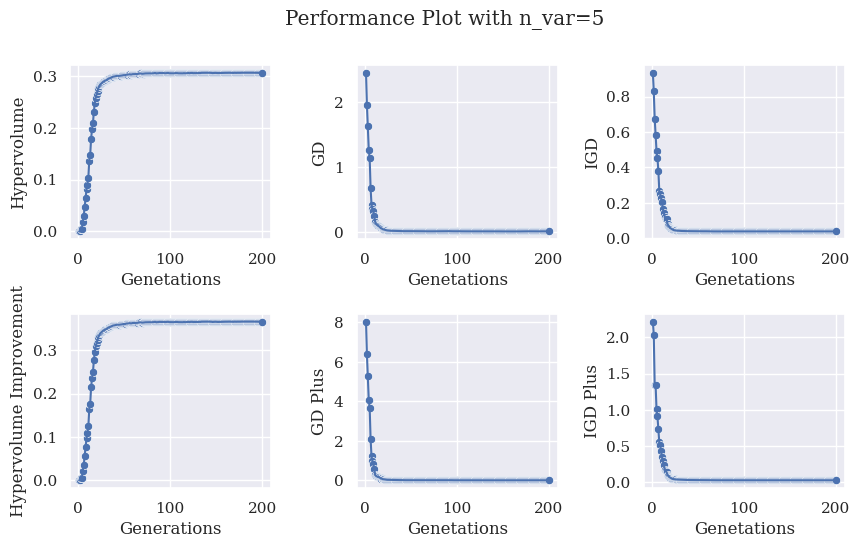

Max values of Hypervolume is 0.30674291534185194 
 , Best value of GD is 0.005907907841239622 
 , Best value of IGD is 
 0.03854396278822048 Best value of GD+ is 0.004649239199721129 , Best value of IGD+ is 0.028194316246727615


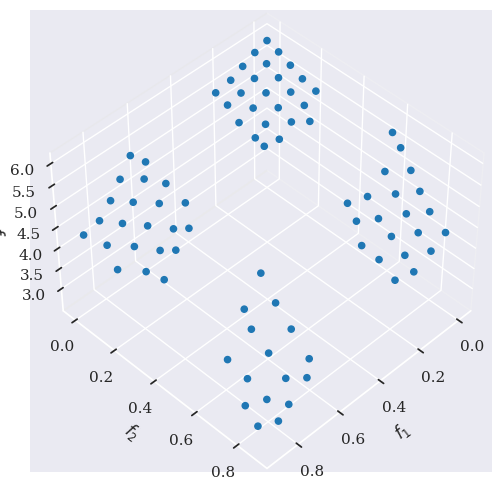

In [37]:
from pymoo.algorithms.moo.nsga3 import NSGA3
model_list = []
problem = DTLZ7(n_var =5)
np.random.seed(19)
algorithm = NSGA3(ref_dirs = ref_dirs)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA3 with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      200 |     18 |  1.3543931894 |  2.9799846211 |  0.000000E+00 |  9.8322078995 |  4.0454740836
     2 |      400 |     17 |  1.3543931894 |  2.2571638707 |  0.000000E+00 |  7.3561220806 |  4.0454740836
     3 |      600 |      9 |  1.1758360949 |  1.4375927413 |  0.000000E+00 |  4.6438549090 |  3.4810584056
     4 |      800 |     16 |  0.7902019438 |  1.5182519740 |  0.000000E+00 |  4.9361598523 |  1.4139866624
     5 |     1000 |     17 |  0.7089275865 |  1.4006567521 |  0.000000E+00 |  4.6127640140 |  1.4139866624
     6 |     1200 |     20 |  0.6481059472 |  0.9983978016 |  0.000000E+00 |  3.1743526086 |  1.3575292991
     7 |     1400 |     26 |  0.4339956842 |  0.6063286184 |  0.0005666465 |  1.7863675698 |  1.1223700930
     8 |     1600 |     20 |  0.3487398977 |  0.5838200923 |  0.0007336869 |  1.6118523878 |  0.7461770803
     9 |     1800 |     23 |  0.32926

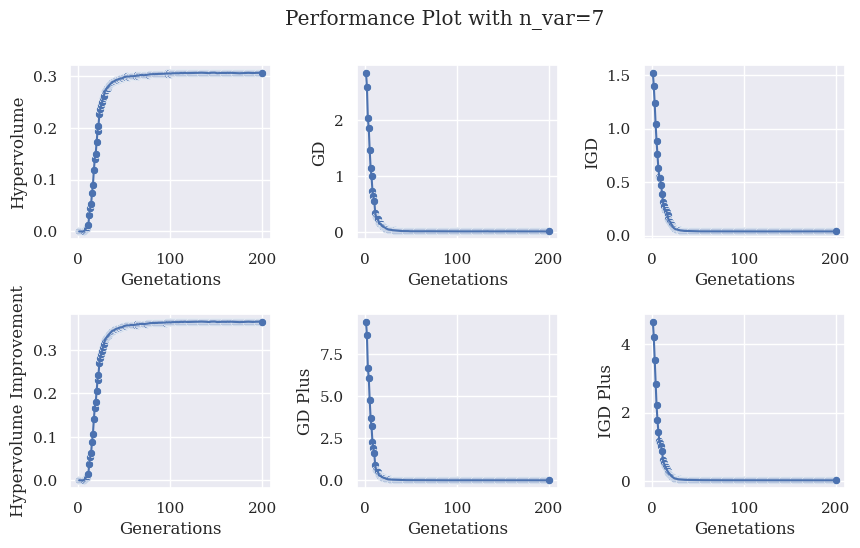

Max values of Hypervolume is 0.3065068006788857 
 , Best value of GD is 0.006871523126381898 
 , Best value of IGD is 
 0.03865188647872657 Best value of GD+ is 0.0054163489774033645 , Best value of IGD+ is 0.02836229335080332


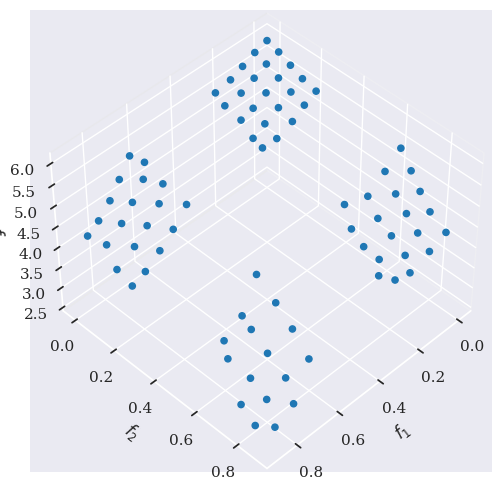

In [38]:
from pymoo.algorithms.moo.nsga3 import NSGA3
model_list = []
problem = DTLZ7(n_var =7)
algorithm = NSGA3(ref_dirs = ref_dirs)
np.random.seed(20)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA3 with nvar10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      200 |     12 |  2.2144672867 |  2.7132442636 |  0.000000E+00 |  8.9144529522 |  7.0749904394
     2 |      400 |     16 |  2.0410095592 |  2.7470307255 |  0.000000E+00 |  9.1372931070 |  6.4895407177
     3 |      600 |     18 |  1.5527783536 |  2.5994351015 |  0.000000E+00 |  8.6283744261 |  4.9446978836
     4 |      800 |     17 |  1.2887313902 |  2.2456394597 |  0.000000E+00 |  7.4656553433 |  3.7150785185
     5 |     1000 |     16 |  1.1570415576 |  1.5883373382 |  0.000000E+00 |  5.2099665798 |  3.6294672531
     6 |     1200 |     11 |  1.2642439961 |  1.3991322789 |  0.000000E+00 |  4.6579164735 |  3.7150785185
     7 |     1400 |     16 |  0.9196861411 |  1.1012012317 |  0.000000E+00 |  3.5830179213 |  2.5262462656
     8 |     1600 |     28 |  0.8598842793 |  1.0137044433 |  0.000000E+00 |  3.3001347561 |  2.0202606347
     9 |     1800 |     11 |  0.68651

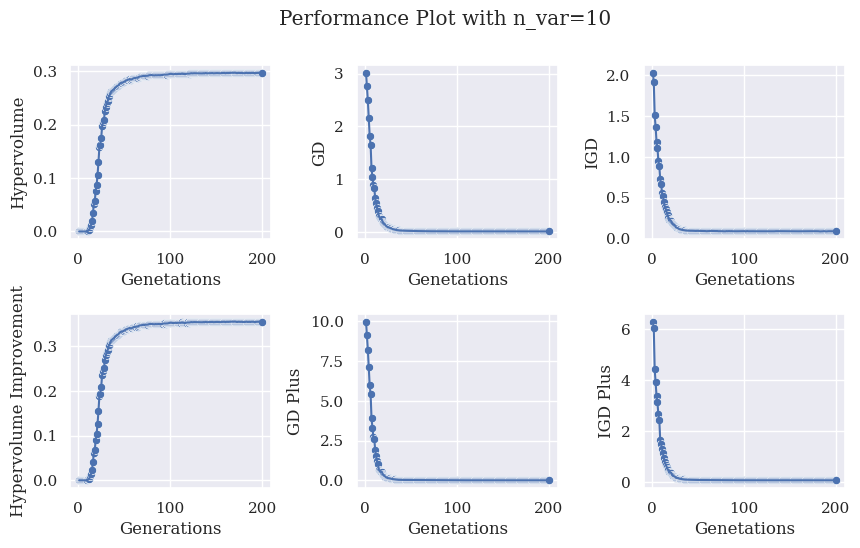

Max values of Hypervolume is 0.2973343589467238 
 , Best value of GD is 0.006495480727491776 
 , Best value of IGD is 
 0.08768502026550214 Best value of GD+ is 0.004992203759983477 , Best value of IGD+ is 0.06715305016839891


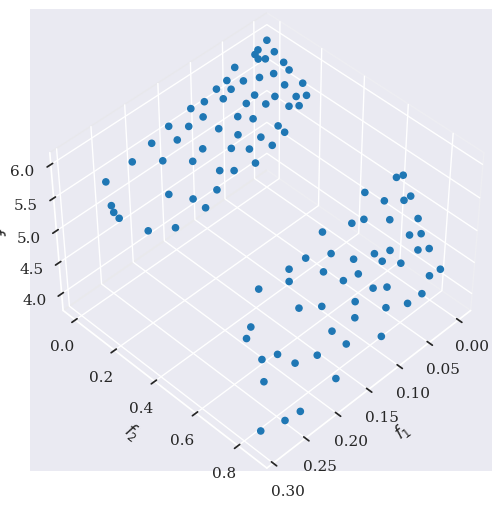

In [39]:
from pymoo.algorithms.moo.nsga3 import NSGA3
model_list = []
problem = DTLZ7(n_var =10)
algorithm = NSGA3(ref_dirs = ref_dirs)
np.random.seed(21)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 200),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(200):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,201)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,201)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,201)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=10)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()